In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/governors_county_candidate.csv')
df_gc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/governors_county.csv')
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')
pd.set_option('display.max_columns', None)
df.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [11]:
#change column 'total_votes' to 'votes', add columns named 'won' 'total_votes' and 'votes/total_votes'
df1 = df.copy()
result = [False]*len(df)
county = df_gc['county']
current_votes = df_gc['current_votes']
total_votes = []
i = 0
for index, row in df1.iterrows():
    if  i < len(df_gc) and row['county'] == county.iloc[i]:
        result[index] = True
        i += 1
    total_votes.append(current_votes.iloc[i-1])
df1['won'] = result
df1['county'] = df1['county'].str.replace(' County', '')
df1.rename(columns={"votes": "winner_votes"}, inplace=True)
df1['total_votes'] = total_votes
df1['winner_votes/total_votes'] = df1['winner_votes'] / df1['total_votes']
df1.head()

,state,county,candidate,party,winner_votes,won,total_votes,winner_votes/total_votes
0,Delaware,Kent,John Carney,DEM,44352,True,85415,0.519253
1,Delaware,Kent,Julianne Murray,REP,39332,False,85415,0.460481
2,Delaware,Kent,Kathy DeMatteis,IPD,1115,False,85415,0.013054
3,Delaware,Kent,John Machurek,LIB,616,False,85415,0.007212
4,Delaware,New Castle,John Carney,DEM,191678,True,280039,0.684469


In [12]:
df_winner = df1.copy()
df_winner.drop(df1[df1['won'] == False].index, inplace = True)
df_winner['REP_won'] = df_winner['party'] == 'REP'
df_winner.head()

,state,county,candidate,party,winner_votes,won,total_votes,winner_votes/total_votes,REP_won
0,Delaware,Kent,John Carney,DEM,44352,True,85415,0.519253,False
4,Delaware,New Castle,John Carney,DEM,191678,True,280039,0.684469,False
8,Delaware,Sussex,Julianne Murray,REP,68435,True,127181,0.538091,True
12,Indiana,Adams,Eric Holcomb,REP,9441,True,14154,0.667020,True
15,Indiana,Allen,Eric Holcomb,REP,98406,True,168312,0.584664,True


Text(0.5, 1.0, '2020 Republican Voting on Senate Election')

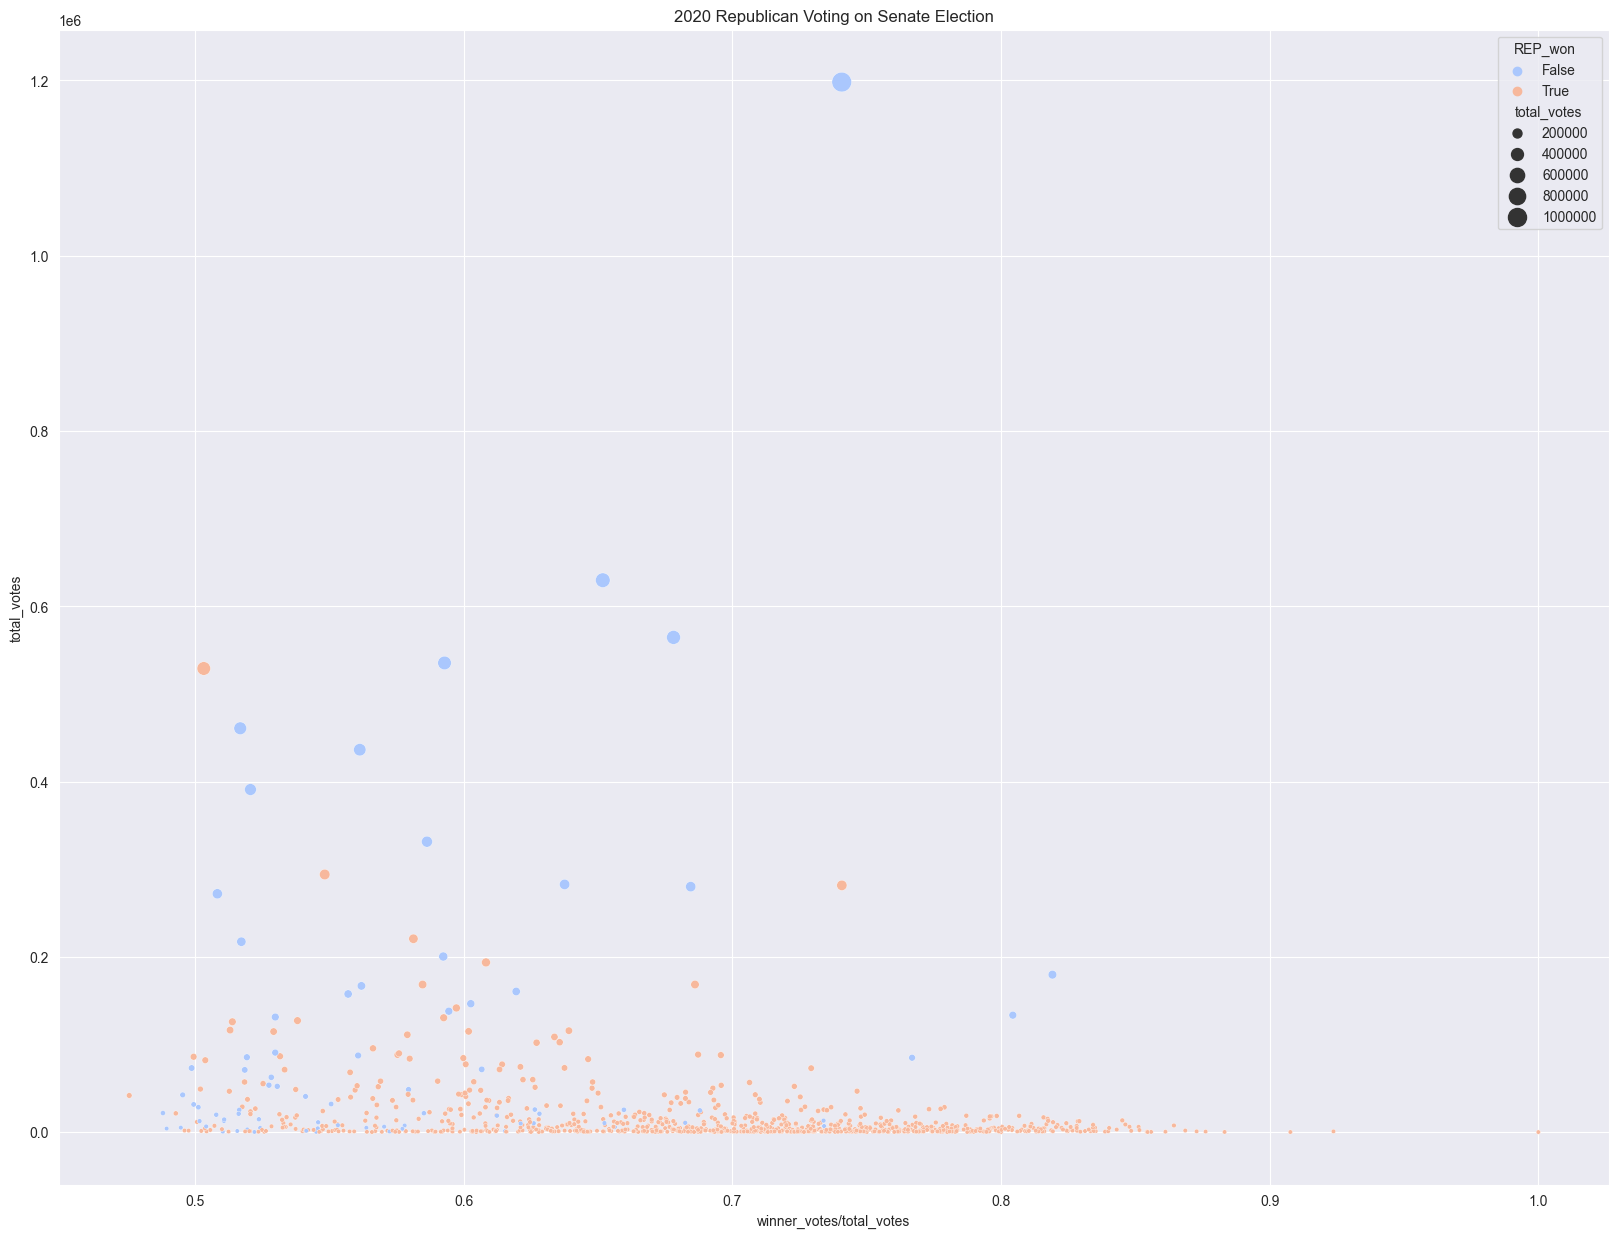

In [13]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df_winner, x = "winner_votes/total_votes", y = "total_votes", hue = "REP_won", size = "total_votes", palette = "coolwarm", sizes=(10,200))
plt.title("2020 Republican Voting on Senate Election")
